# Pythonで理解する統計解析の基礎

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('./data/ch2_scores_em.csv', index_col='生徒番号')

In [2]:
en_scores = np.array(df['英語'])
ma_scores = np.array(df['数学'])

scores_df = pd.DataFrame({'英語':en_scores,'数学':ma_scores})
scores_df.head()

,英語,数学
0,42,65
1,69,80
2,56,63
3,41,63
4,57,76


In [3]:
summary_df = scores_df.copy()
summary_df['英語の偏差'] = summary_df['英語'] - summary_df['英語'].mean()
summary_df['数学の偏差'] = summary_df['数学'] - summary_df['数学'].mean()
summary_df['偏差同士の積'] = summary_df['英語の偏差']*summary_df['数学の偏差']
summary_df.head()

,英語,数学,英語の偏差,数学の偏差,偏差同士の積
0,42,65,-16.38,-13.88,227.3544
1,69,80,10.62,1.12,11.8944
2,56,63,-2.38,-15.88,37.7944
3,41,63,-17.38,-15.88,275.9944
4,57,76,-1.38,-2.88,3.9744


In [4]:
cov_mat = np.cov(en_scores, ma_scores, ddof=0)
cov_mat

array([[94.1156, 58.4856],
       [58.4856, 69.3856]])

In [5]:
np.var(en_scores)

94.1156

In [6]:
np.corrcoef(en_scores, ma_scores)

array([[1.        , 0.72374149],
       [0.72374149, 1.        ]])

In [7]:
pip install matplotlib

You should consider upgrading via the '/Users/aokikento/.pyenv/versions/3.8.5/bin/python3.8 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


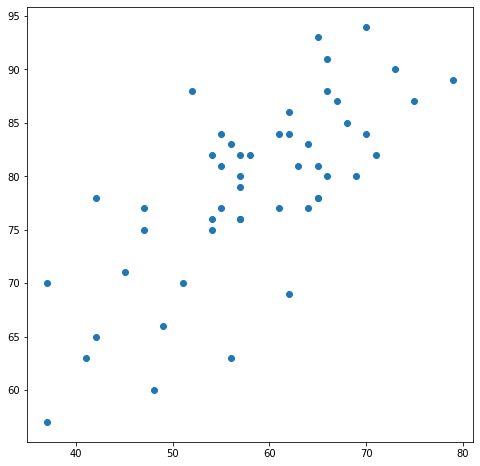

In [8]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111)
ax.scatter(en_scores, ma_scores)

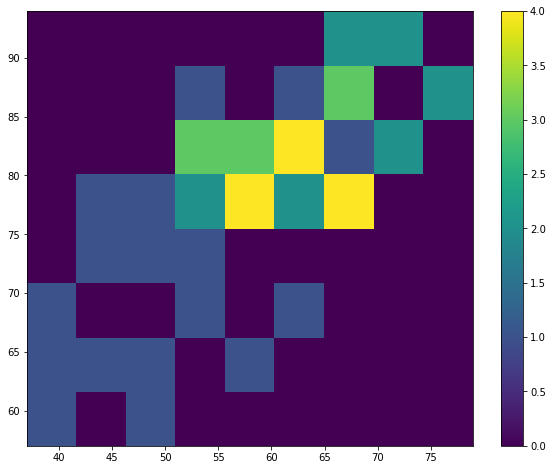

In [9]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
c = ax.hist2d(en_scores, ma_scores, bins=[9,8])
fig.colorbar(c[3],ax=ax)

In [10]:
import numpy as np
import pandas as pd
df = pd.read_csv('./data/ch1_sport_test.csv')
df

,生徒番号,学年,握力,上体起こし,点数,順位
0,1,1,40.2,34,15,4
1,2,1,34.2,14,7,10
2,3,1,28.8,27,11,7
3,4,2,39.0,27,14,5
4,5,2,50.9,32,17,2
5,6,2,36.5,20,9,9
6,7,3,36.6,31,13,6
7,8,3,49.2,37,18,1
8,9,3,26.0,28,10,8
9,10,3,47.4,32,16,3


In [11]:
df['握力']

0    40.2
1    34.2
2    28.8
3    39.0
4    50.9
5    36.5
6    36.6
7    49.2
8    26.0
9    47.4
Name: 握力, dtype: float64

In [12]:
df = pd.read_csv('./data/ch2_scores_em.csv', index_col='生徒番号')
df.head()

,英語,数学
生徒番号,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


In [13]:
scores = np.array(df['英語'])[:10]
scores

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58])

In [14]:
scores_df = pd.DataFrame({'点数':scores},index=pd.Index(list('ABCDEFGHIJ')))
scores_df

,点数
A,42
B,69
C,56
D,41
E,57
F,48
G,65
H,49
I,65
J,58


In [15]:
sum(scores) / len(scores)

55.0

In [16]:
np.mean(scores)

55.0

In [17]:
np.median(scores)

56.5

In [18]:
x = np.array([1,2,2,4,3,4,3,1,1,35,3])
content, cnt = np.unique(x, return_counts=True)
content[np.argmax(cnt)]

1

In [19]:
m = np.mean(scores ,dtype=int)
deviation = scores - m
deviation

array([-13,  14,   1, -14,   2,  -7,  10,  -6,  10,   3])

In [20]:
scores_df['偏差'] = deviation
scores_df.mean()

点数    55.0
偏差     0.0
dtype: float64

In [21]:
np.mean(deviation**2)

86.0

In [22]:
np.var(scores)

86.0

In [23]:
scores_df['偏差二乗'] = np.square(deviation)
scores_df

,点数,偏差,偏差二乗
A,42,-13,169
B,69,14,196
C,56,1,1
D,41,-14,196
E,57,2,4
F,48,-7,49
G,65,10,100
H,49,-6,36
I,65,10,100
J,58,3,9


In [24]:
scores_df.mean()

点数      55.0
偏差       0.0
偏差二乗    86.0
dtype: float64

In [25]:
np.std(scores)

9.273618495495704

In [26]:
np.sqrt(np.var(scores))

9.273618495495704

In [27]:
pd.Series(scores).describe()

count    10.000000
mean     55.000000
std       9.775252
min      41.000000
25%      48.250000
50%      56.500000
75%      63.250000
max      69.000000
dtype: float64

In [28]:
z = 50 + 10*(scores - np.mean(scores)) / np.std(scores)
z

array([35.98173948, 65.09658825, 51.07832773, 34.90341175, 52.15665546,
       42.45170588, 60.78327732, 43.53003361, 60.78327732, 53.2349832 ])

In [29]:
scores_df['偏差値'] = z.round()
scores_df['偏差値']
scores_df

,点数,偏差,偏差二乗,偏差値
A,42,-13,169,36.0
B,69,14,196,65.0
C,56,1,1,51.0
D,41,-14,196,35.0
E,57,2,4,52.0
F,48,-7,49,42.0
G,65,10,100,61.0
H,49,-6,36,44.0
I,65,10,100,61.0
J,58,3,9,53.0


In [30]:
english = np.array(df['英語'])
english

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58, 70, 47, 51, 64, 62, 70, 71,
       68, 73, 37, 65, 65, 61, 52, 57, 57, 75, 61, 47, 54, 66, 54, 54, 42,
       37, 79, 56, 62, 62, 55, 63, 57, 57, 67, 55, 45, 66, 55, 64, 66])

In [31]:
freq, _ = np.histogram(english, bins=10, range=(0,100))
freq

array([ 0,  0,  0,  2,  8, 16, 18,  6,  0,  0])

In [32]:
freq_class = [f'{i}~{i+10}' for i in range(0,100,10)]
freq_dist_df = pd.DataFrame({'度数':freq}, index=pd.Index(freq_class,name='階級'))

In [33]:
freq_dist_df

,度数
階級,
0~10,0
10~20,0
20~30,0
30~40,2
40~50,8
50~60,16
60~70,18
70~80,6
80~90,0


In [34]:
class_value = [(i+(i+10))//2 for i in range(0,100,10)]
class_value

[5, 15, 25, 35, 45, 55, 65, 75, 85, 95]

In [35]:
rel_freq = freq/freq.sum()
rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.16, 0.32, 0.36, 0.12, 0.  , 0.  ])

In [36]:
cum_rel_freq = np.cumsum(rel_freq)
cum_rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.2 , 0.52, 0.88, 1.  , 1.  , 1.  ])

In [37]:
freq_dist_df['階級値'] = class_value
freq_dist_df['相対度数'] = rel_freq
freq_dist_df['累積相対度数'] = cum_rel_freq
freq_dist_df

,度数,階級値,相対度数,累積相対度数
階級,,,,
0~10,0,5,0.00,0.00
10~20,0,15,0.00,0.00
20~30,0,25,0.00,0.00
30~40,2,35,0.04,0.04
40~50,8,45,0.16,0.20
50~60,16,55,0.32,0.52
60~70,18,65,0.36,0.88
70~80,6,75,0.12,1.00
80~90,0,85,0.00,1.00


In [38]:
freq_dist_df.loc[freq_dist_df['度数'].idxmax(), '階級値'] # 最頻値

65

In [39]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'test')

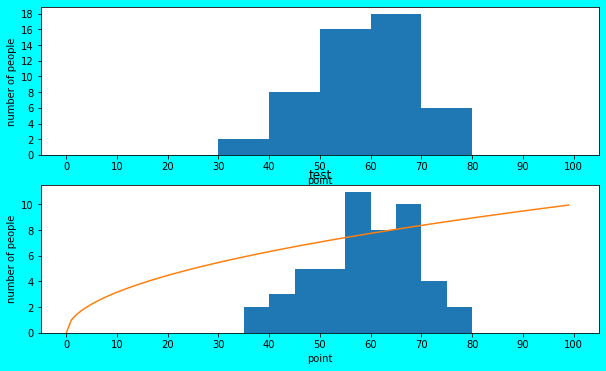

In [40]:

fig = plt.figure(figsize=(10,6),facecolor='cyan')
ax = fig.add_subplot(211)
freq,_,_ = ax.hist(english, bins=10,range=(0,100))
ax.set_xlabel('point')
ax.set_ylabel('number of people')
ax.set_xticks(np.linspace(0,100,10+1))
ax.set_yticks(np.arange(0,freq.max()+1,2))

ax2 = fig.add_subplot(212)
freq,_,_ = ax2.hist(english, bins=20,range=(0,100))
r = np.arange(100,dtype=int)
ax2.plot(r,r**(1/2))
ax2.set_xlabel('point')
ax2.set_ylabel('number of people')
ax2.set_xticks(np.linspace(0,100,10+1))
ax2.set_yticks(np.arange(0,freq.max()+1,2))
ax2.set_title('test')

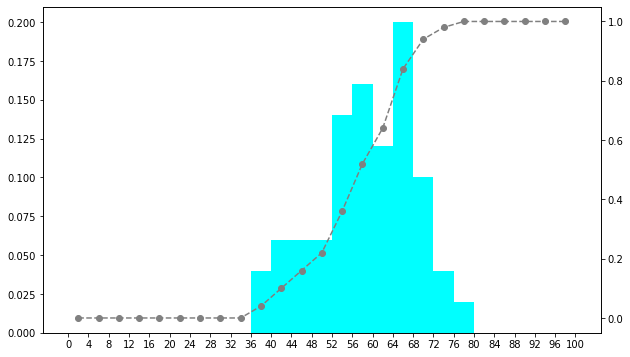

In [41]:
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()

weights = np.ones_like(english) / len(english)
rel_freq, _, _ = ax1.hist(english, bins=25, range=(0,100), weights=weights,color='cyan')
cum_rel_freq = np.cumsum(rel_freq)
class_value = [(i+(i+4))//2 for i in range(0,100,4)]

ax2.plot(class_value, cum_rel_freq, ls='--',marker='o',color='gray')
ax1.set_xticks(np.linspace(0,100,25+1))

In [42]:
df['英語の偏差'] = df['英語'] - df['英語'].mean()
df['数学の偏差'] = df['数学'] - df['数学'].mean()
df['偏差の積'] = df['英語の偏差'] * df['数学の偏差']
df.head()

,英語,数学,英語の偏差,数学の偏差,偏差の積
生徒番号,,,,,
1,42,65,-16.38,-13.88,227.3544
2,69,80,10.62,1.12,11.8944
3,56,63,-2.38,-15.88,37.7944
4,41,63,-17.38,-15.88,275.9944
5,57,76,-1.38,-2.88,3.9744


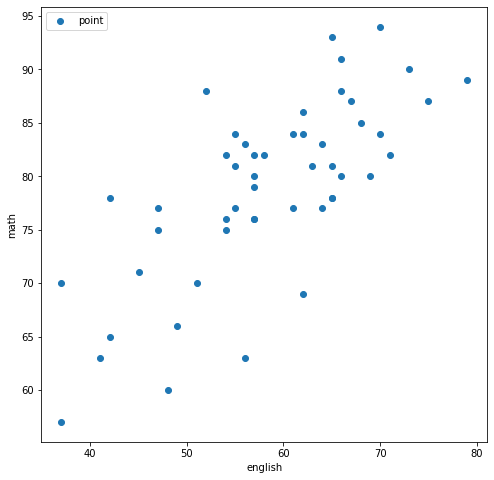

In [43]:
en_scores = np.array(df['英語'])
mt_scores = np.array(df['数学'])
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111)
ax.scatter(en_scores, mt_scores, label='point')
ax.set_xlabel('english')
ax.set_ylabel('math')
ax.legend(loc='upper left')

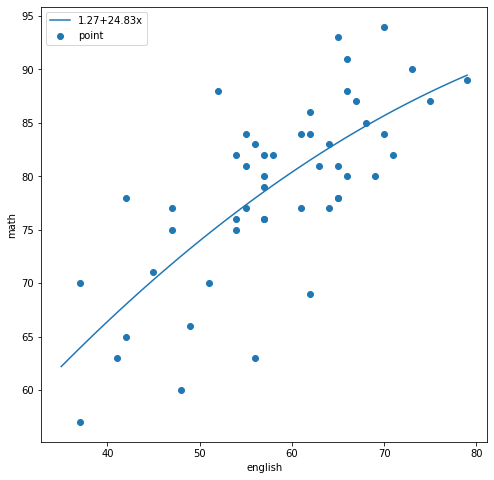

In [44]:
poly_fit = np.polyfit(en_scores, mt_scores, 2)
poly_1d = np.poly1d(poly_fit)
x = np.arange(35,80)
ys = poly_1d(x)
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
ax.scatter(en_scores,mt_scores,label='point')
ax.set_xlabel('english')
ax.set_ylabel('math')
ax.plot(x,ys,label=f'{poly_fit[1]:.2f}+{poly_1d[0]:.2f}x')
ax.legend(loc='upper left')

<ipython-input-45-ac3d604b6f74>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.arange(11))


[Text(-2.0, 0, '0'),
 Text(0.0, 0, '1'),
 Text(2.0, 0, '2'),
 Text(4.0, 0, '3'),
 Text(6.0, 0, '4'),
 Text(8.0, 0, '5'),
 Text(10.0, 0, '6'),
 Text(12.0, 0, '7')]

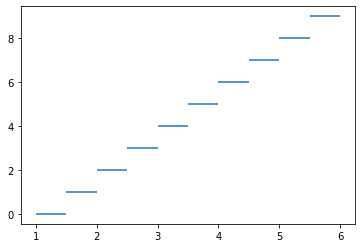

In [45]:
fig = plt.figure()
ax = fig.add_subplot(111)
x = np.arange(10)
ax.hlines(x, np.arange(10),np.arange(1,11))
ax.set_xticklabels(np.arange(11))

Text(0, 0.5, 'probability')

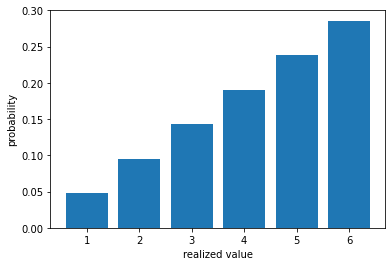

In [46]:
x_set = np.arange(1,7)

def f(x):
    if x in x_set:
        return x/21
    else:
        return 0

X = [x_set, f]
prob = np.array([f(x_k) for x_k in x_set])
fig = plt.figure()
ax = fig.add_subplot(111)
ax.bar(x_set, prob)
ax.set_xlabel('realized value')
ax.set_ylabel('probability')

In [47]:
np.all(prob>=0)

True

In [48]:
np.sum(prob)

0.9999999999999999

In [49]:
def F(x):
    return np.sum([f(x_k) for x_k in x_set if x_k <= x])
F(3)

0.2857142857142857

In [50]:
y_set = np.array([2*x_k + 3 for x_k in x_set])


In [51]:
np.sum([x_k*f(x_k) for x_k in x_set])

4.333333333333333

In [52]:
sample = np.random.choice(x_set, int(1e6),p=prob)
np.mean(sample)

4.334647

In [53]:
def E(X, g = lambda x: x):
    x_set, f = X
    return np.sum([g(x_k)*f(x_k) for x_k in x_set])

In [54]:
E(X)

4.333333333333333

In [55]:
E(X, g = lambda x:2*x+3)

11.666666666666664

In [56]:
2*E(X) + 3

11.666666666666666

In [57]:
mean = E(X)
np.sum([(x_k - mean)**2 * f(x_k) for x_k in x_set])

2.2222222222222223

In [58]:
def V(X, g=lambda x:x):
    x_set, f = X
    mean = E(X, g)
    return np.sum([(g(x_k) - mean)**2 * f(x_k) for x_k in x_set])
V(X)

2.2222222222222223

In [59]:
V(X, lambda x: 2*x+3)

8.88888888888889

In [60]:
x_set = np.arange(2,13)
y_set = np.arange(1,7)
def f_XY(x, y):
    if 1 <= y <= 6 and 1 <= x-y <=6:
        return y*(x-y)/441
    else:
        return 0

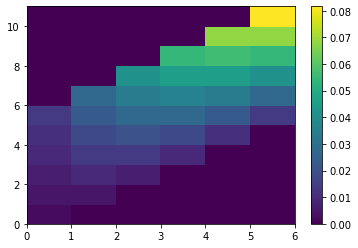

In [61]:
XY = [x_set, y_set, f_XY]
prob = np.array([[f_XY(x_i, y_j) for y_j in y_set] for x_i in x_set])

fig = plt.figure()
ax = fig.add_subplot(111)
c = ax.pcolor(prob)
fig.colorbar(c, ax=ax)

In [62]:
np.all(prob>=0)

True

In [63]:
np.sum(prob)

1.0

In [64]:
def f_X(x):
    return np.sum([f_XY(x, y_k) for y_k in y_set])

def f_Y(y):
    return np.sum([f_XY(x_k, y) for x_k in x_set])

In [65]:
X = [x_set, f_X]
Y = [y_set, f_Y]

Text(0.5, 1.0, 'y marginal probability')

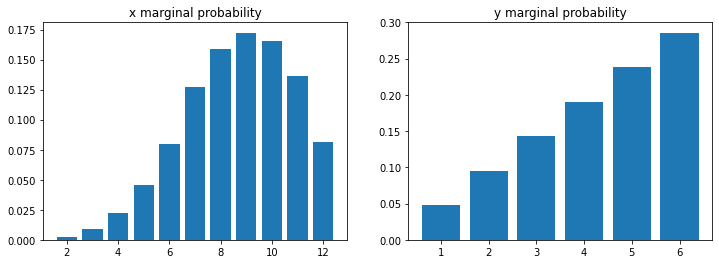

In [66]:
prob_x = np.array([f_X(x_k) for x_k in x_set])
prob_y = np.array([f_Y(y_k) for y_k in y_set])

fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.bar(x_set, prob_x)
ax2.bar(y_set, prob_y)
ax1.set_title('x marginal probability')
ax2.set_title('y marginal probability')

In [67]:
from scipy import stats

In [68]:
linestyles = ['-', '--', ':']

def E(X, g=lambda x:x):
    x_set, f = X
    return np.sum([g(x_k)*f(x_k) for x_k in x_set])

def V(x, g=lambda x:x):
    x_set, f = X
    mean = E(x,g)
    return np.sum([(g(x_k)-mean)**2*f(x_k) for x_k in x_set])

def check_prob(x):
    x_set, f = X
    prob = np.array([f(x_k) for x_k in x_set])
    assert np.all(prob >= 0), '負の確率がありマス'
    prob_sum = np.round(np.sum(prob),6)
    assert prob_sum == 1, f'確率の和が{prob_sum}になりました'
    print(f'期待値:{E(X)}')
    print(f'分散:{V(X)}')
    
def plot_prob(X):
    x_set, f = X
    prob = np.array([f(x_k) for x_k in x_set])
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.bar(x_set, prob, label = 'prob')
    ax.vlines(E(X),0,1,label = 'mean')
    ax.set_ylim(0,prob.max()*1.2)
    ax.legend()


In [69]:
import numpy as np
import matplotlib.pyplot as plt
def Bern(p):
    x_set = np.array([0,1])
    def f(x):
        if x in x_set:
            return p**x*(1-p)**(1-x)
        else:
            return 0
    return x_set, f
p = 0.9
X = Bern(p)

In [70]:
check_prob(X)

期待値:0.9
分散:0.08999999999999998


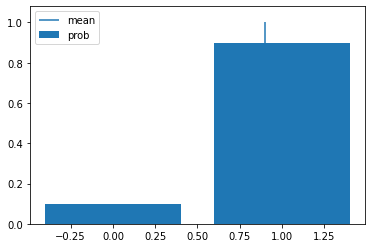

In [71]:
plot_prob(X)

In [72]:
rv = stats.bernoulli(p)
rv.pmf(0), rv.pmf(1)

(0.09999999999999998, 0.9)

In [73]:
rv.cdf([0,1])

array([0.1, 1. ])

In [74]:
rv.mean(), rv.var()

(0.9, 0.08999999999999998)

In [75]:
from scipy.special import comb

def Bin(n, p):
    x_set = np.arange(n+1)
    def f(x):
        if x in x_set:
            return comb(n, x) * p**x * (1-p)**(n-x)
        else:
            return 0
    return x_set, f

In [76]:
n = 100
p = 0.3
X = Bin(n, p)

In [77]:
check_prob(X)

期待値:29.99999999999983
分散:20.99999999999988


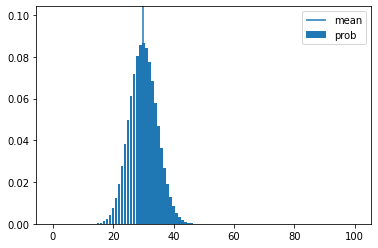

In [78]:
plot_prob(X)

In [79]:
def Ge(p):
    x_set = np.arange(1,30)
    def f(x):
        if x in x_set:
            return p*(1-p)**(x-1)
        else:
            return 0
    return x_set, f

In [80]:
p = 0.5
X = Ge(p)
check_prob(X)

期待値:1.9999999422580004
分散:1.9999984297901363


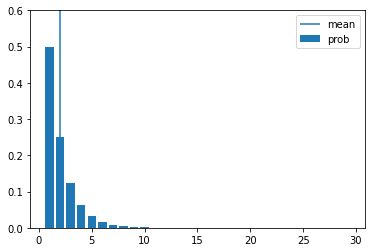

In [81]:
plot_prob(X)

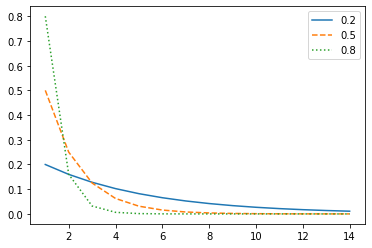

In [82]:
fig = plt.figure()
ax = fig.add_subplot(111)
x_set = np.arange(1,15)
for p, ls in zip([0.2, 0.5, 0.8], linestyles):
    rv = stats.geom(p)
    ax.plot(x_set, rv.pmf(x_set),label=p,ls=ls)
ax.legend()    

In [83]:
from scipy.special import factorial

def Poi(lam):
    x_set = np.arange(20)
    def f(x):
        if x in x_set:
            return np.power(lam,x)/factorial(x)*np.exp(-lam)
        else:
            return 0
    return x_set, f

In [84]:
lam = 3
X = Poi(lam)

In [85]:
check_prob(X)

期待値:2.9999999983234913
分散:2.99999997549028


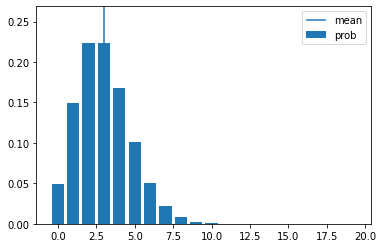

In [86]:
plot_prob(X)

In [87]:
from scipy import integrate

In [88]:
x_range = np.array([0,1])
def f(x):
    if x_range[0] <= x <= x_range[1]:
        return 2*x
    else:
        return 0
X = [x_range, f]

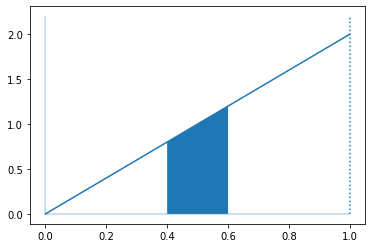

In [89]:
xs = np.linspace(x_range[0], x_range[1], 100)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(xs, [f(x) for x in xs])
ax.hlines(0,0,1,alpha=0.3)
ax.vlines(0,0,2.2,alpha=0.3)
ax.vlines(xs.max(), 0, 2.2, linestyles=':')
xs = np.linspace(0.4, 0.6, 100)
ax.fill_between(xs, [f(x) for x in xs])

In [90]:
integrate.quad(f, 0.4, 0.6)

(0.19999999999999996, 2.2204460492503127e-15)

In [91]:
integrate.quad(f, -np.inf, np.inf)

(1.0, 2.5284034865791227e-09)

In [92]:
def F(x):
    return integrate.quad(f, -np.inf, x)[0]

In [93]:
F(0.6) - F(0.4)

0.20000000000014648

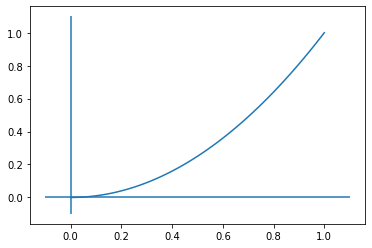

In [94]:
xs = np.linspace(x_range[0], x_range[1], 100)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(xs,[F(x) for x in xs], label='F(x)')
ax.hlines(0,-0.1,1.1)
ax.vlines(0,-0.1,1.1)

In [95]:
y_range = [3,5]
def g(y):
    if y_range[0] <= y <= y_range[1]:
        return (y-3)/2
    else:
        return 0
def G(y):
    return integrate.quad(g, -np.inf,y)[0]

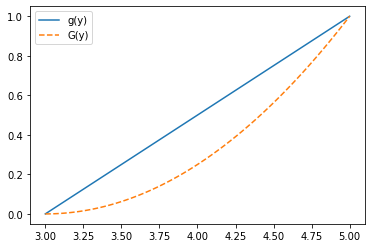

In [96]:
ys = np.linspace(y_range[0], y_range[1],100)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(ys, [g(y) for y in ys], label='g(y)')
ax.plot(ys, [G(y) for y in ys], label='G(y)',ls='--')
ax.legend()

In [97]:
x_range = [0,2]
y_range = [0,1]
def f_xy(x,y):
    if 0<=y<=1 and 0<=x-y<=1:
        return 4*y*(x-y)
    else:
        return 0
XY = [x_range, y_range, f_xy]

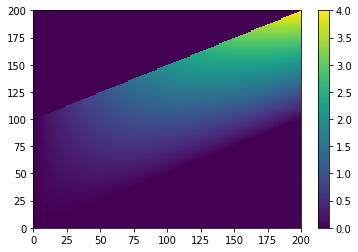

In [98]:
xs = np.linspace(x_range[0],x_range[1],200)
ys = np.linspace(y_range[0],y_range[1],200)
pd = np.array([[f_xy(x,y) for y in ys] for x in xs])
fig = plt.figure()
ax = fig.add_subplot(111)
c = ax.pcolor(pd)
fig.colorbar(c, ax=ax)

In [103]:
from functools import partial

def f_X(x):
    return integrate.quad(partial(f_xy, x), -np.inf, np.inf)[0]
def f_Y(y):
    return integrate.quad(partial(f_xy, y=y), -np.inf, np.inf)[0]
X = [x_range, f_X]
Y = [y_range, f_Y]

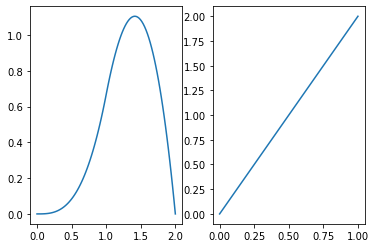

In [104]:
xs = np.linspace(*x_range, 100)
ys = np.linspace(*y_range, 100)

fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.plot(xs, [f_X(x) for x in xs])
ax2.plot(ys, [f_Y(y) for y in ys])